In [2]:
from wordcloud import WordCloud
import numpy as np
import nltk 
import re
import os
import matplotlib.pyplot as plt
from PIL import Image
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
%matplotlib inline

In [3]:
os.chdir('D:/SEM VI/NCDL')

In [4]:
f = open('book_three_little_pigs.txt', 'r', encoding='utf-8')
my_book = f.readlines()
f.close()

In [5]:
my_book

['THERE was an old sow with three little pigs, and as she had not enough to keep them, she sent them out to seek their fortune. The first that went off met a man with a bundle of straw, and said to him:\n',
 '\n',
 "'Please, man, give me that straw to build a house.'\n",
 '\n',
 'Which the man did, and the little pig built a house with it. Presently came along a wolf, and knocked at the door, and said:\n',
 '\n',
 "'Little pig, little pig, let me come in.' To which the pig answered:\n",
 '\n',
 "'No, no, by the hair of my chiny chin chin.' The wolf then answered to that:\n",
 '\n',
 "'Then I'll huff, and I'll puff, and I'll blow your house in.'\n",
 '\n',
 'So he huffed, and he puffed, and he blew his house in, and ate up the little pig.\n',
 '\n',
 'The second little pig met a man with a bundle of furze and said:\n',
 '\n',
 "'Please, man, give me that furze to build a house.'\n",
 '\n',
 'Which the man did, and the pig built his house. Then along came the wolf, and said:\n',
 '\n',
 

In [6]:
#preprocessing
n_min = 4 
corpus = [] 

lematizer = WordNetLemmatizer()

for a_line in my_book:
    pre = re.sub(r'\W+', ' ', a_line)
    pre = re.sub(r'\d+', ' ', pre)
    
    pre = nltk.word_tokenize(pre)
    
    pre = [x for x in pre if len(x) >= n_min]
    
    pre = [x.lower() for x in pre]
    
    pre = [x for x in pre if x not in stopwords.words('english')]
    pre = [lematizer.lemmatize(x) for x in pre]
    corpus += pre

In [7]:
len(corpus)

322

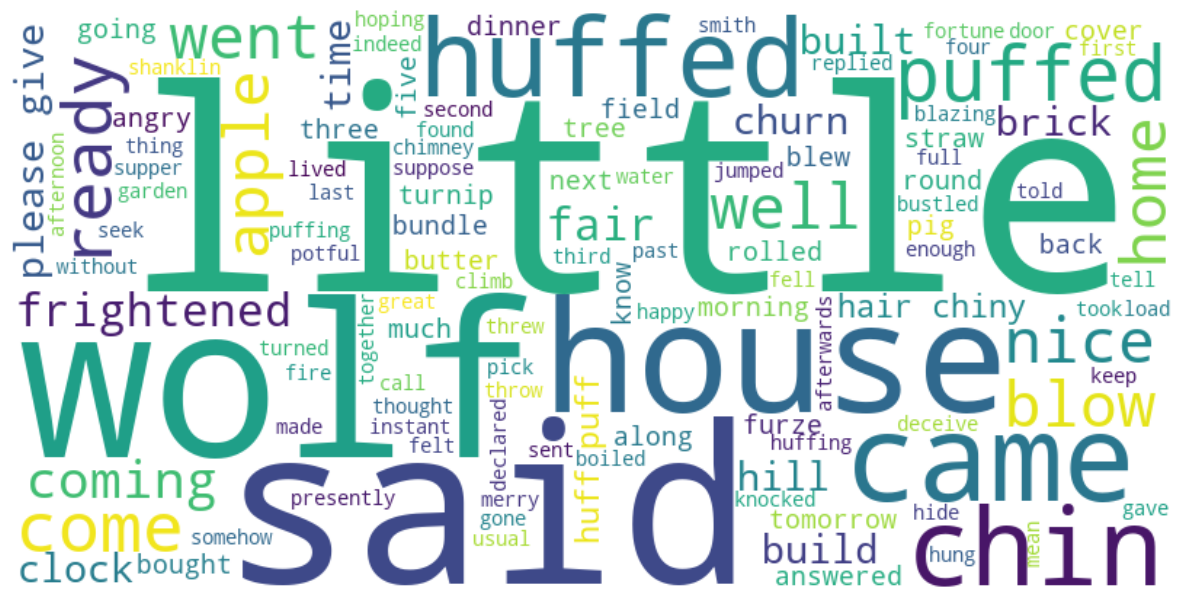

In [10]:
a_long_sentence = ' '.join(corpus)

wc = WordCloud(background_color='white',max_words=2000, width=800, height=400)
wc.generate(a_long_sentence)

plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
os.getcwd()

'D:\\SEM VI\\NCDL'

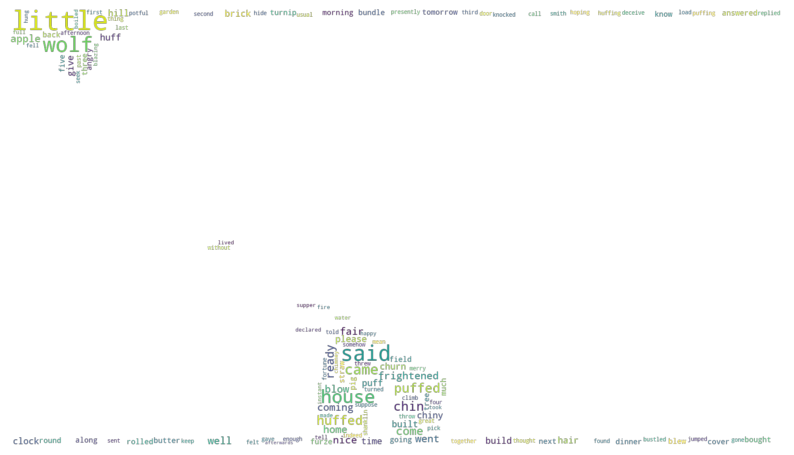

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

# ---- Load Image ----
img = Image.open("hokage.jpg").convert("L")  # grayscale

mask = np.array(img)

# IMPORTANT
# black area -> words allowed
# white area -> blocked

mask = np.where(mask < 50, 0, 255).astype(np.uint8)

# ---- WordCloud ----
wc = WordCloud(
    background_color=None,   # IMPORTANT
    mode="RGBA",             # transparent background
    max_words=2000,
    mask=mask,
    collocations=False,
    prefer_horizontal=0.9
)

wc.generate(a_long_sentence)

# ---- Plot ----
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.savefig("wordcloud.png", dpi=300, transparent=True)
plt.show()